<h1 style="text-align:center;">MNIST Handwritten Digit Classification</h1>

<h2>MODEL 1</h2>

In [10]:
# preparing first cnn model
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.2206 - acc: 0.9320 - val_loss: 0.0558 - val_acc: 0.9817
Epoch 2/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0627 - acc: 0.9810 - val_loss: 0.0394 - val_acc: 0.9873
Epoch 3/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0455 - acc: 0.9862 - val_loss: 0.0328 - val_acc: 0.9888
Epoch 4/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0357 - acc: 0.9890 - val_loss: 0.0332 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0299 - acc: 0.9910 - val_loss: 0.0296 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0241 - acc: 0.9926 - val_loss: 0.0281 - val_acc: 0.9908
Epoch 7/12
60000/60000 [=========================

In [0]:
# function to create plot
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

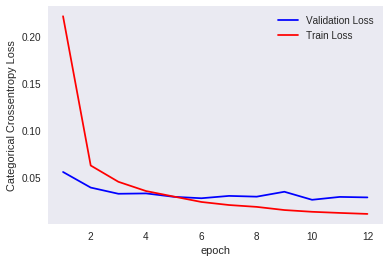

In [14]:
# calling function plt_dynamic
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>MODEL 2</h2>

In [15]:
# preparing second cnn model
batch_size = 96
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(24, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(48, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.40))
model.add(Flatten())
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.60))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 168s 3ms/step - loss: 0.3189 - acc: 0.9016 - val_loss: 0.0586 - val_acc: 0.9823
Epoch 2/15
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1299 - acc: 0.9618 - val_loss: 0.0418 - val_acc: 0.9864
Epoch 3/15
60000/60000 [==============================] - 168s 3ms/step - loss: 0.1034 - acc: 0.9699 - val_loss: 0.0360 - val_acc: 0.9884
Epoch 4/15
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0887 - acc: 0.9742 - val_loss: 0.0384 - val_acc: 0.9887
Epoch 5/15
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0780 - acc: 0.9773 - val_loss: 0.0392 - val_acc: 0.9874
Epoch 6/15
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0711 - acc: 0.9798 - val_loss: 0.0338 - val_acc: 0.9894
Epoch 7/15
60000/60000 [=========================

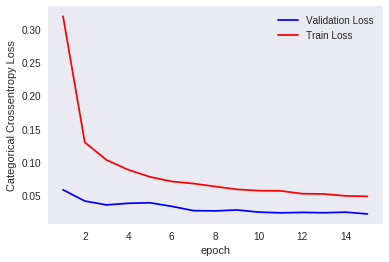

In [16]:
# calling function plt_dynamic 
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>MODEL 3</h3>

In [17]:
# preparing third cnn model
batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.80))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 303s 5ms/step - loss: 0.5208 - acc: 0.8346 - val_loss: 0.0781 - val_acc: 0.9747
Epoch 2/20
60000/60000 [==============================] - 301s 5ms/step - loss: 0.2142 - acc: 0.9380 - val_loss: 0.0534 - val_acc: 0.9827
Epoch 3/20
60000/60000 [==============================] - 301s 5ms/step - loss: 0.1642 - acc: 0.9529 - val_loss: 0.0390 - val_acc: 0.9874
Epoch 4/20
60000/60000 [==============================] - 300s 5ms/step - loss: 0.1439 - acc: 0.9590 - val_loss: 0.0384 - val_acc: 0.9877
Epoch 5/20
60000/60000 [==============================] - 299s 5ms/step - loss: 0.1262 - acc: 0.9649 - val_loss: 0.0394 - val_acc: 0.9880
Epoch 6/20
60000/60000 [==============================] - 301s 5ms/step - loss: 0.1100 - acc: 0.9686 - val_loss: 0.0284 - val_acc: 0.9905
Epoch 7/20
60000/60000 [=========================

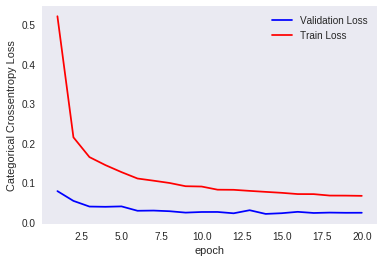

In [18]:
# calling function plt_dynamic
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>Conclusion :- </h2>

In [20]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Number of Epochs","Kernel Size","Dropout Rates" ,"Train log loss","Train Accuracy","Test log loss","Test Accuracy"]
x.add_row(["Model 1","12","(3,3)","(0.15,0.30)","0.0115","99.62","0.0290","99.20"])
x.add_row(["Model 2","15","(5,5)","(0.40,0.60)","0.0488","98.61","0.0255","99.32"])
x.add_row(["Model 3","20","(7,7)","(0.50,0.80)","0.0661","98.20","0.0233","99.40"])
print (x)

+---------+------------------+-------------+---------------+----------------+----------------+---------------+---------------+
|  Model  | Number of Epochs | Kernel Size | Dropout Rates | Train log loss | Train Accuracy | Test log loss | Test Accuracy |
+---------+------------------+-------------+---------------+----------------+----------------+---------------+---------------+
| Model 1 |        12        |    (3,3)    |  (0.15,0.30)  |     0.0115     |     99.62      |     0.0290    |     99.20     |
| Model 2 |        15        |    (5,5)    |  (0.40,0.60)  |     0.0488     |     98.61      |     0.0255    |     99.32     |
| Model 3 |        20        |    (7,7)    |  (0.50,0.80)  |     0.0661     |     98.20      |     0.0233    |     99.40     |
+---------+------------------+-------------+---------------+----------------+----------------+---------------+---------------+


<h2>Steps Followed :-</h2>

- Load the MNIST dataset.
- Train and test split of the MNIST dataset.
- Converting class vectors to binary class matrices.
- Trying out different CNN architectures with different kernels, dropout rates and number of epochs on MNIST dataset.
- Draw categorical crossentropy loss vs number of epochs plot.
- At the end in the conclusion section compare training and test log loss for each model. 